<a href="https://colab.research.google.com/github/SowjanyaKiran/sowjanya-/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN # Import SimpleRNN
import warnings
warnings.filterwarnings('ignore')

In [3]:
# step 1 : load the IMDB dataset
vocab_size = 10000
max_len =250
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Step 2 : Preprocess the data
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [5]:
# Step 3 : Build the model
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(SimpleRNN(units=32))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer = 'SGD' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

# Summary
model.summary()

# Step 4 : Training the model
history = model.fit(x_train, y_train, batch_size = 64, epochs = 20, validation_data = (x_test, y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 381s 959ms/step - accuracy: 0.4930 - loss: 0.6952 - val_accuracy: 0.4961 - val_loss: 0.6935
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 406s 1s/step - accuracy: 0.5041 - loss: 0.6931 - val_accuracy: 0.4988 - val_loss: 0.6935
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 438s 1s/step - accuracy: 0.5069 - loss: 0.6929 - val_accuracy: 0.4999 - val_loss: 0.6932
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - accuracy: 0.5095 - loss: 0.6926 - val_accuracy: 0.5051 - val_loss: 0.6928
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - accuracy: 0.5174 - loss: 0.6919 - val_accuracy: 0.5050 - val_loss: 0.6932
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 445s 1s/step - accuracy: 0.5262 - loss: 0.6909 - val_accuracy: 0.5457 - val_loss: 0.6905
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 403s 1s/step - accuracy: 0.5408 - loss: 0.6895 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 439s 1s/step - accuracy: 0.5426 - loss: 0.6870 - val_a

In [9]:
# Step 5 -> Evaluate the model
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 113ms/step - accuracy: 0.7367 - loss: 0.5319
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 113ms/step - accuracy: 0.7235 - loss: 0.5446


In [7]:
# Step 6 -> Prediction
sample_review = "This movie was fantastic! I loved every minute of it."

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = imdb.get_word_index()

# Tokenize the input text
sample_review_tokens = [tokenizer.get(word, 0) for word in sample_review.lower().split()]
sample_review_tokens_padded = pad_sequences([sample_review_tokens], maxlen = max_len)

# Making the predictions
prediction = model.predict([sample_review_tokens_padded])
print(f"Predicted Sentiment: {'Positive' if prediction > 0.5 else 'Negative'}")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step
Predicted Sentiment: Positive


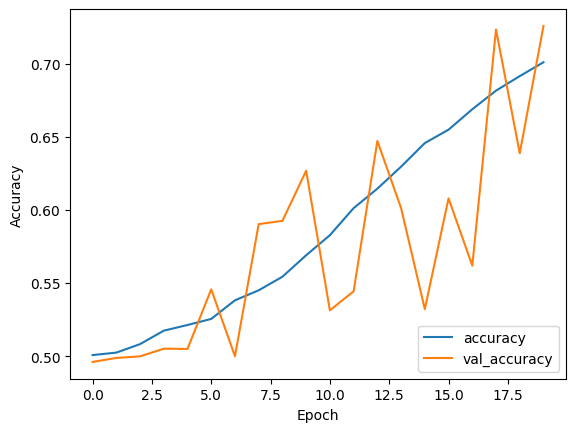

In [8]:
# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
